# 1 Wrangling - San Francisco Police Incidents

## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Wrangling - San Francisco Police Incidents](#1_Wrangling_-_San_Francisco_Police_Incidents)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load The Data](#1.4_Load_The_Data)
  * [1.5 Explore The Data](#1.5_Explore_The_Data)
    * [1.5.1 Shape and Column Analysis](#1.5.1_Shape_and_Column_Analysis)
    * [1.5.2 Dropping unneeded columns](#1.5.2_Dropping_unneeded_columns)
    * [1.5.3 Reviewing NULL values](#1.5.3_Reviewing_NULL_values)
      * [1.5.3.1 Filed Online](#1.5.3.1_Filed_Online)
      * [1.5.3.2 Analysis Neighborhood](#1.5.3.2_Analysis_Neighborhood)
    * [1.5.4 Categorical Features](#1.5.4_Categorical_Features)
      * [1.5.4.1 Police District](#1.5.4.1_Police_District)
      * [1.5.4.2 Analysis Neighborhood](#1.5.4.2_Analysis_Neighborhood)
      * [1.5.4.3 Supervisor District](#1.5.4.3_Supervisor_District)
      * [1.5.4.4 Incident Category](#1.5.4.4_Incident_Category)
      * [1.5.4.5 Incident Subcategory](#1.5.4.5_Incident_Subcategory)
  * [1.13 Summary](#1.13_Summary)

## 1.2 Introduction<a id='1.2_Introduction'></a>

Data was exported from <a href="https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783">San Francisco's Open Data portal regarding Police Department Incident Reports: 2018 to Present</a> into CSV files on October 20, 2020. This dataset includes incident reports that have been filed as of January 1, 2018. These reports are filed by officers or self-reported by members of the public using SFPD’s online reporting system.

We plan to explore this data in conjunction with San Francisco's 311 data as well as Redfin's San Francisco neighborhood house sales data, and we will do this by comparing across San Francisco neighborhoods and supervisor districts.

## 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Load The Data<a id='1.4_Load_The_Data'></a>

Note that the single CSV file was too large for GitHub, therefore, it had to be split into 6 smaller files, one for each half year, starting in 2018

In [47]:
filename_prefix = 'raw_data/Police_Department_Incident_Reports__'
filename_suffix = '.csv'
list_of_periods = ['2018_1', '2018_2', '2019_1', '2019_2', '2020_1', '2020_2']

incident_data = pd.DataFrame()

for period in list_of_periods:
    filename = filename_prefix + period + filename_suffix
    period_data = pd.read_csv(filename, low_memory=False)
#    print(filename)
#    print(period_data.shape)
#    print(period_data.info())
    incident_data = incident_data.append(period_data)

In [48]:
incident_data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2020/09/29 12:29:00 PM,96531109029,965311,200586298,202731493.0,...,False Personation to Receive Money or Property,Open or Active,FRANKLIN ST \ BUSH ST,26498000.0,Northern,Western Addition,2.0,37.788280,-122.423594,"(37.78827973195545, -122.42359407328958)"
1,2018/01/01 12:01:00 AM,2018/01/01,00:01,2018,Monday,2020/09/20 06:50:00 AM,96296268020,962962,200566397,202640619.0,...,Miscellaneous Investigation,Open or Active,HOWARD ST \ 06TH ST,23946000.0,Southern,South of Market,6.0,37.779739,-122.407159,"(37.77973890462704, -122.40715948914875)"
2,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2020/09/08 01:08:00 PM,95970009027,959700,200540874,202521623.0,...,False Personation,Open or Active,SAN BRUNO AVE \ OLMSTEAD ST,20576000.0,Bayview,Portola,9.0,37.722832,-122.401613,"(37.722832384254595, -122.40161258024654)"
3,2018/01/01 12:42:00 PM,2018/01/01,12:42,2018,Monday,2018/01/01 12:42:00 PM,61897707041,618977,171035750,NaN,...,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
4,2018/01/01 04:49:00 PM,2018/01/01,16:49,2018,Monday,2018/01/01 04:49:00 PM,61901507045,619015,171055203,NaN,...,"Vehicle, Recovered, Truck",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN


## 1.5 Explore The Data<a id='1.5_Explore_The_Data'></a>

### 1.5.1 Shape and Column Analysis<a id='1.5.1_Shape_and_Column_Analysis'></a>

In [49]:
incident_data.shape

(395149, 26)

In [50]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        395149 non-null  object 
 1   Incident Date            395149 non-null  object 
 2   Incident Time            395149 non-null  object 
 3   Incident Year            395149 non-null  int64  
 4   Incident Day of Week     395149 non-null  object 
 5   Report Datetime          395149 non-null  object 
 6   Row ID                   395149 non-null  int64  
 7   Incident ID              395149 non-null  int64  
 8   Incident Number          395149 non-null  int64  
 9   CAD Number               306560 non-null  float64
 10  Report Type Code         395149 non-null  object 
 11  Report Type Description  395149 non-null  object 
 12  Filed Online             81760 non-null   object 
 13  Incident Code            395149 non-null  int64  
 14  Incid

There are 26 columns and 395149 rows. All rows have a non-null `Incident Description`. However, since we are interested specifically in the breakdown of these incidents by neighborhood and district, we note that there exist null values in `Analysis Neighborhood` and `Supervisor District`. 

In [51]:
incident_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Incident Datetime,2018/01/01 12:00:00 AM,2018/01/01 12:01:00 AM,2018/01/01 12:00:00 AM,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/01 04:07:00 AM,2018/01/01 04:00:00 PM,2018/01/01 12:10:00 AM,2018/01/01 12:55:00 AM,2018/01/01 12:55:00 AM
Incident Date,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01,2018/01/01
Incident Time,00:00,00:01,00:00,12:42,16:49,04:07,16:00,00:10,00:55,00:55
Incident Year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday
Report Datetime,2020/09/29 12:29:00 PM,2020/09/20 06:50:00 AM,2020/09/08 01:08:00 PM,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/02 09:25:00 AM,2018/01/09 10:27:00 AM,2018/01/01 12:40:00 AM,2018/01/01 01:41:00 AM,2018/01/01 01:41:00 AM
Row ID,96531109029,96296268020,95970009027,61897707041,61901507045,62075106372,62267806372,61868707041,61869104134,61869115300
Incident ID,965311,962962,959700,618977,619015,620751,622678,618687,618691,618691
Incident Number,200586298,200566397,200540874,171035750,171055203,186002716,186008316,171051427,180000172,180000172
CAD Number,2.02731e+08,2.02641e+08,2.02522e+08,NaN,NaN,NaN,NaN,NaN,1.8001e+08,1.8001e+08


Note that `Incident Datetime`, `Incident Date` and `Incident Time` are currently `object` datatypes. Let's convert them to DateTime.

In [52]:
print(incident_data['Incident Datetime'].dtypes)
print(incident_data['Incident Date'].dtypes)
print(incident_data['Incident Time'].dtypes)

object
object
object


In [53]:
incident_data['Incident Datetime'] = pd.to_datetime(incident_data['Incident Datetime'])
incident_data['Incident Date'] = pd.to_datetime(incident_data['Incident Date'])
incident_data['Incident Time'] = pd.to_datetime(incident_data['Incident Time'])

In [54]:
print(incident_data['Incident Datetime'].dtypes)
print(incident_data['Incident Date'].dtypes)
print(incident_data['Incident Time'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


### 1.5.2 Dropping unneeded columns<a id='1.5.2_Dropping_unneeded_columns'></a>

We will drop the following columns to clean up the data:
 * `CAD Number`:  The number generated by the Computer Aided Dispatch (CAD) system used by the Department of Emergency Management (DEM) to dispatch officers and other public safety personnel.
 * `CNN` : Centerline Node Network identifier used to refer to the Intersection
 * `Latitude`, `Longitude`, and `point`

In [55]:
incident_data.drop(columns=['CAD Number', 'CNN', 'Latitude', 'Longitude', 'point'], inplace=True)

In [56]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        395149 non-null  datetime64[ns]
 1   Incident Date            395149 non-null  datetime64[ns]
 2   Incident Time            395149 non-null  datetime64[ns]
 3   Incident Year            395149 non-null  int64         
 4   Incident Day of Week     395149 non-null  object        
 5   Report Datetime          395149 non-null  object        
 6   Row ID                   395149 non-null  int64         
 7   Incident ID              395149 non-null  int64         
 8   Incident Number          395149 non-null  int64         
 9   Report Type Code         395149 non-null  object        
 10  Report Type Description  395149 non-null  object        
 11  Filed Online             81760 non-null   object        
 12  Incident Code    

### 1.5.3 Reviewing NULL values<a id='1.5.1_Shape_and_Column_Analysis'></a>

#### 1.5.3.1 Filed Online<a id='1.5.3.1_Filed_Online'></a>

Notice that `Filed Online` has a large number of null values. The documentation states that: "Non- emergency police reports can be filed online by members of the public using SFPD’s self-service reporting system called Coplogic Values in this field will be “TRUE” if Coplogic was used to file the report."

In [57]:
incident_data['Filed Online'].value_counts()

True    81760
Name: Filed Online, dtype: int64

We should be able to verify this against `Report Type Description`, for which the documentation describes as: "The description of the report type, can be one of: Initial; Initial Supplement; Vehicle Initial; Vehicle Supplement; Coplogic Initial; Coplogic Supplement"

In [58]:
incident_data['Report Type Description'].value_counts()

Initial                246030
Coplogic Initial        72549
Initial Supplement      32376
Vehicle Initial         20745
Vehicle Supplement      14238
Coplogic Supplement      9211
Name: Report Type Description, dtype: int64

In [59]:
incident_data['Report Type Description'].isin(['Coplogic Initial','Coplogic Supplement']).sum()

81760

Looks good! This means we can fill in the null values with the value of False.

In [60]:
incident_data['Filed Online'].fillna(False, inplace=True)
incident_data['Filed Online'].value_counts()

False    313389
True      81760
Name: Filed Online, dtype: int64

#### 1.5.3.2 Analysis Neighborhood<a id='1.5.3.2_Analysis_Neighborhood'></a>

We have approximately 20,000 NULL values for this field. Let's look at examples and the breakdown.

In [61]:
incident_data['Analysis Neighborhood'].isna().sum()

20461

In [62]:
incident_data[incident_data['Analysis Neighborhood'].isna()].head().T

,3,4,5,6,7
Incident Datetime,2018-01-01 12:42:00,2018-01-01 16:49:00,2018-01-01 04:07:00,2018-01-01 16:00:00,2018-01-01 00:10:00
Incident Date,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00
Incident Time,2020-10-20 12:42:00,2020-10-20 16:49:00,2020-10-20 04:07:00,2020-10-20 16:00:00,2020-10-20 00:10:00
Incident Year,2018,2018,2018,2018,2018
Incident Day of Week,Monday,Monday,Monday,Monday,Monday
Report Datetime,2018/01/01 12:42:00 PM,2018/01/01 04:49:00 PM,2018/01/02 09:25:00 AM,2018/01/09 10:27:00 AM,2018/01/01 12:40:00 AM
Row ID,61897707041,61901507045,62075106372,62267806372,61868707041
Incident ID,618977,619015,620751,622678,618687
Incident Number,171035750,171055203,186002716,186008316,171051427
Report Type Code,VS,VS,II,II,VS


In [63]:
incident_data[incident_data['Analysis Neighborhood'].isna()].groupby(['Incident Year','Report Type Description'])['Incident ID'].count()

Incident Year  Report Type Description
2018           Coplogic Initial           5606
               Coplogic Supplement         661
               Initial                     172
               Initial Supplement          229
               Vehicle Initial              66
               Vehicle Supplement         1209
2019           Coplogic Initial           5559
               Coplogic Supplement         771
               Initial                     293
               Initial Supplement          362
               Vehicle Initial             113
               Vehicle Supplement         1266
2020           Coplogic Initial           2302
               Coplogic Supplement         257
               Initial                      78
               Initial Supplement          148
               Vehicle Initial              71
               Vehicle Supplement         1298
Name: Incident ID, dtype: int64

Let's create a data frame with the counts of the null neighborhood against the total records, by Incident month year and Report Type Description.

In [64]:
df_nullnbrhds = incident_data['Analysis Neighborhood'].isna().groupby([incident_data['Incident Date'].dt.to_period('M'),
                                                       incident_data['Report Type Description']]).sum().astype(int).rename('null_nbrhd_count').to_frame().T.append(
incident_data['Analysis Neighborhood'].notna().groupby([incident_data['Incident Date'].dt.to_period('M'),
                                                       incident_data['Report Type Description']]).sum().astype(int).rename('has_nbrhd_count').to_frame().T
).T.reset_index()

In [65]:
df_nullnbrhds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Incident Date            204 non-null    period[M]
 1   Report Type Description  204 non-null    object   
 2   null_nbrhd_count         204 non-null    int32    
 3   has_nbrhd_count          204 non-null    int32    
dtypes: int32(2), object(1), period[M](1)
memory usage: 4.9+ KB


In [66]:
df_nullnbrhds['total'] = df_nullnbrhds['null_nbrhd_count'] + df_nullnbrhds['has_nbrhd_count']
df_nullnbrhds['Pct_missing'] = df_nullnbrhds['null_nbrhd_count'] * 100 / df_nullnbrhds['total']

# Verify we have included all records
df_nullnbrhds['total'].sum()

395149

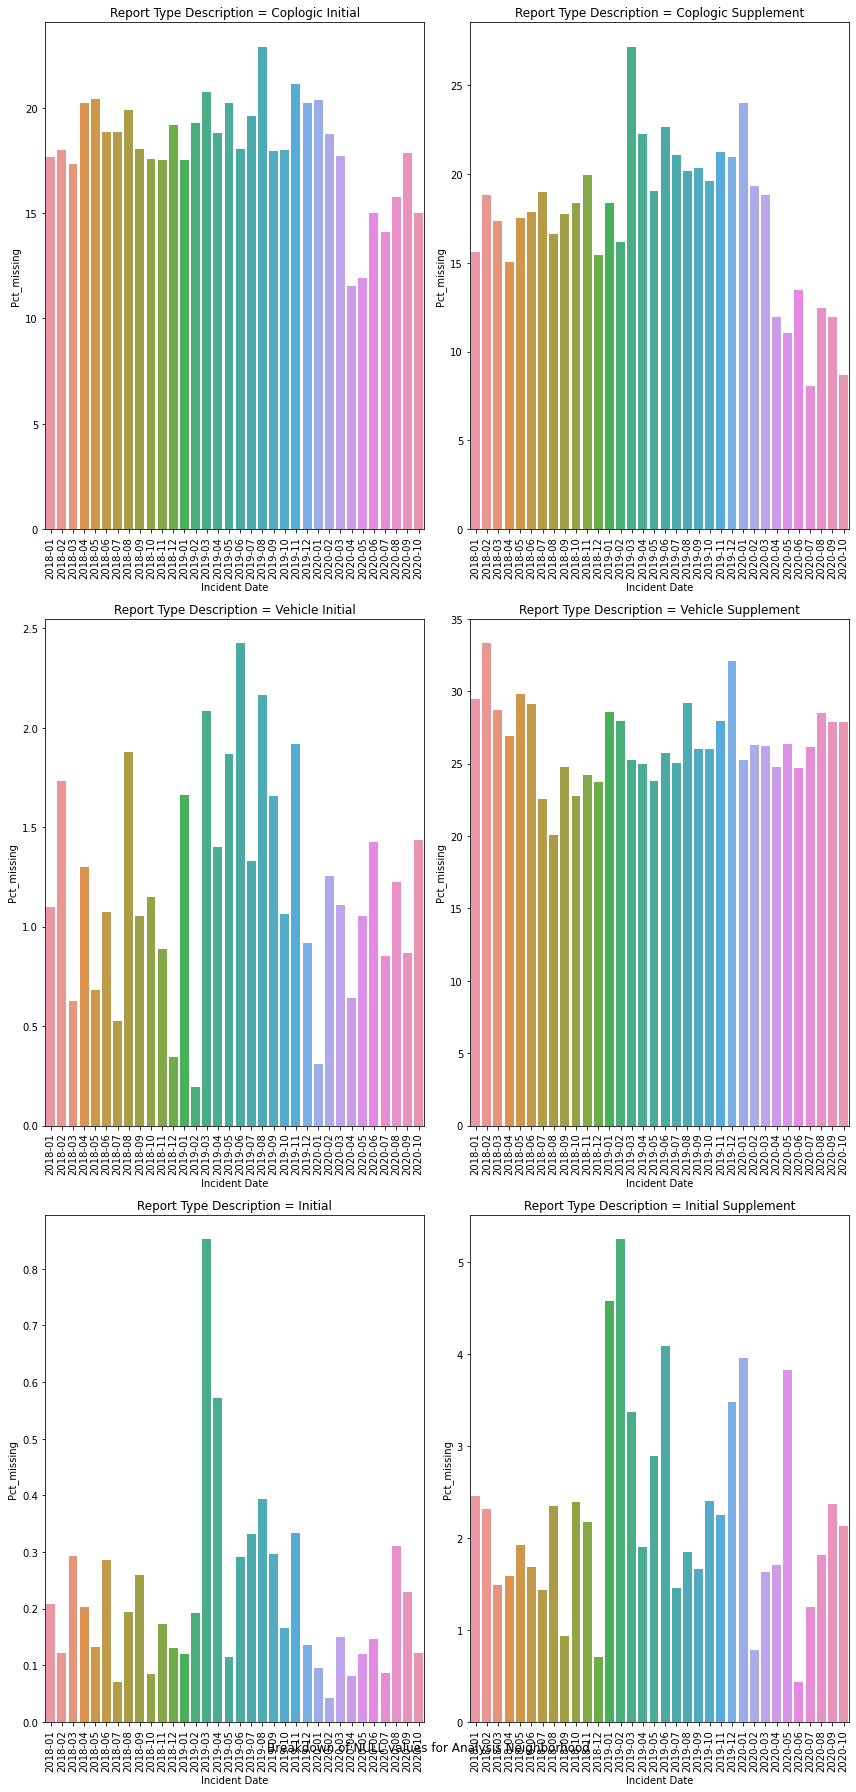

In [67]:
# Plot the percentages missing for each report type across time
report_types = ["Coplogic Initial", "Coplogic Supplement", "Vehicle Initial", "Vehicle Supplement", "Initial", "Initial Supplement"]

fig, ax = plt.subplots(3, 2, figsize=(12,25))

for j in range(len(ax)):
    for i in range(len(ax[j])):
        report_type = report_types[2*j + i]
        ax[j][i].set_xlabel('label', fontsize=10, position=(.5,20))
        ax[j][i].tick_params(axis='x', rotation=90)
        ax[j][i].set_ylabel('label', fontsize=10)
        ax[j][i] = sns.barplot(x="Incident Date", y="Pct_missing", data=df_nullnbrhds[df_nullnbrhds["Report Type Description"] == report_type], ax=ax[j][i], ci=None)
        ax[j][i].set_title("Report Type Description = " + report_type)
fig.suptitle("Breakdown of NULL values for Analysis Neighborhood", y=.03)
fig.tight_layout()

plt.show()

For the report types from Coplogic, which are user entered, we are definitely missing approx 20% neighborhood data.
For Vehicle Supplement reports, neighborhood data that is missing is even higher, nearly 30%.
However, the Initial and Initial Supplement data appears to be in good shape, less than 1% for the former and less than 5% for the latter. Let's leave this for now.

In [68]:
df_nullnbrhds_overall = df_nullnbrhds.groupby('Report Type Description').agg({'null_nbrhd_count':'sum','total':'sum'}).reset_index()
df_nullnbrhds_overall['Pct_missing'] = df_nullnbrhds_overall['null_nbrhd_count'] * 100 / df_nullnbrhds_overall['total']
df_nullnbrhds_overall

,Report Type Description,null_nbrhd_count,total,Pct_missing
0,Coplogic Initial,13467,72549,18.562627
1,Coplogic Supplement,1689,9211,18.336771
2,Initial,543,246030,0.220705
3,Initial Supplement,739,32376,2.282555
4,Vehicle Initial,250,20745,1.205110
5,Vehicle Supplement,3773,14238,26.499508


### 1.5.4 Categorical Features<a id='1.5.4_Categorical_Features'></a>

In [69]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395149 entries, 0 to 32888
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        395149 non-null  datetime64[ns]
 1   Incident Date            395149 non-null  datetime64[ns]
 2   Incident Time            395149 non-null  datetime64[ns]
 3   Incident Year            395149 non-null  int64         
 4   Incident Day of Week     395149 non-null  object        
 5   Report Datetime          395149 non-null  object        
 6   Row ID                   395149 non-null  int64         
 7   Incident ID              395149 non-null  int64         
 8   Incident Number          395149 non-null  int64         
 9   Report Type Code         395149 non-null  object        
 10  Report Type Description  395149 non-null  object        
 11  Filed Online             395149 non-null  bool          
 12  Incident Code    

#### 1.5.4.1 Police District<a id='1.5.4.1_Police_District'></a>

Let's look at how many `Police District`s we have.

In [70]:
incident_data['Police District'].value_counts().to_frame().sort_index().reset_index()["index"]

0        Bayview
1        Central
2      Ingleside
3        Mission
4       Northern
5      Out of SF
6           Park
7       Richmond
8       Southern
9        Taraval
10    Tenderloin
Name: index, dtype: object

#### 1.5.4.2 Analysis Neighborhood<a id='1.5.4.2_Analysis_Neighborhood'></a>

Let's look at how many `Analysis Neighborhood`s we have.

In [72]:
incident_data['Analysis Neighborhood'].value_counts().to_frame().sort_index()

,Analysis Neighborhood
Bayview Hunters Point,22654
Bernal Heights,6711
Castro/Upper Market,11584
Chinatown,7323
Excelsior,6276
Financial District/South Beach,33143
Glen Park,1976
Golden Gate Park,3978
Haight Ashbury,6412
Hayes Valley,10486


We will have to be aware of how these map to the 311 data and the housing sales data.

#### 1.5.4.3 Supervisor District<a id='1.5.4.3_Supervisor_District'></a>

In [74]:
incident_data['Supervisor District'].value_counts().to_frame().sort_index()

,Supervisor District
1.0,17540
2.0,26973
3.0,57110
4.0,10502
5.0,38666
6.0,89015
7.0,15423
8.0,28588
9.0,38264
10.0,39091


#### 1.5.4.4 Incident Category<a id='1.5.4.4_Incident_Category'></a>

In [82]:
incident_data['Incident Category'].value_counts().to_frame().reset_index().rename(columns={"index":"name","Incident Category":"count"})

,name,count
0,Larceny Theft,121667
1,Other Miscellaneous,29241
2,Malicious Mischief,24795
3,Non-Criminal,24231
4,Assault,23435
5,Burglary,20097
6,Motor Vehicle Theft,16291
7,Warrant,13580
8,Lost Property,13188
9,Recovered Vehicle,12890


#### 1.5.4.5 Incident Subcategory<a id='1.5.4.5_Incident_Subcategory'></a>

In [83]:
incident_data['Incident Subcategory'].value_counts().to_frame().reset_index().rename(columns={"index":"name","Incident Subcategory":"count"})

,name,count
0,Larceny - From Vehicle,68828
1,Other,53233
2,Larceny Theft - Other,30128
3,Vandalism,24357
4,Motor Vehicle Theft,16186
...,...,...
70,Robbery - Residential,16
71,Bribery,5
72,Arrest,3
73,"Human Trafficking (A), Commercial Sex Acts",1
